In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

%matplotlib inline

# Кластеризація

Розглянемо випадок коли третій стовпець вважаємо числовим

In [2]:
df = pd.read_csv('demo_numeric.csv')

Розібємо дані на дві частини тренувальні і тестові

In [3]:
X_train, X_test = train_test_split(df.values, random_state=9)

In [4]:
X_train.shape, X_test.shape

((43953, 3), (14651, 3))

Промаштабуємо дані так, щоб одиничну диперсію

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled.var(axis=0)

array([ 1.,  1.,  1.])

Для кластеризації скористаємось алгоритмом DBSCAN оскільки він вміє працювати з даними які містять шум і для нього не потрібно задавати число кластерів, він підрахує їх сам.

Спробуємо визначити кластери спочатку для стандартних налаштувань методу

In [8]:
dbscan = DBSCAN(n_jobs=-1)

In [9]:
clusters = dbscan.fit_predict(X_train_scaled)

In [10]:
np.unique(clusters, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([    6, 24803,  1768,  6277,  5578,  2719,  2802]))

Отриманий результат уже доволі правдоподібний. Спробуємо уточнити деякі параметни щоб точно впевненись у отриманій кількості кластерів

In [11]:
for eps in np.arange(0.1, 0.8, 0.05):
    print("\neps={}".format(np.round(eps, 3)))
    dbscan = DBSCAN(eps=eps, n_jobs=-1)
    clusters = dbscan.fit_predict(X_train_scaled)
    res = np.unique(clusters, return_counts=True)
    print("Отримані кластери: {}".format(res[0]))
    print("Розміри кластера: {}".format(res[1]))


eps=0.1
Отримані кластери: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Розміри кластера: [  706 24622     6  6058  5379    39  2649    13   347  2154    29    14
    54     8   375   249     6    36    71    54    12    80    23    26
    21    85    26    42     6     7     9    20    28    95    11    11
     5     9    18     9    25     9     8    40    10     7     8    10
    11     5    24    38     8    15    11     6    20     5    23     5
    18     7     8     7    17     5     5     9     5     7     7     6
     5     5     7     8     8     6     8    10     5     7     6     7
     8     5     7    10     9     1     7     3     4     6     5     5]

eps=0.15
Отримані кластери: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 1

In [12]:
for eps in np.arange(0.5, 0.55, 0.01):
    print("\neps={}".format(np.round(eps, 3)))
    dbscan = DBSCAN(eps=eps, n_jobs=-1)
    clusters = dbscan.fit_predict(X_train_scaled)
    res = np.unique(clusters, return_counts=True)
    print("Отримані кластери: {}".format(res[0]))
    print("Розміри кластера: {}".format(res[1]))


eps=0.5
Отримані кластери: [-1  0  1  2  3  4  5]
Розміри кластера: [    6 24803  1768  6277  5578  2719  2802]

eps=0.51
Отримані кластери: [-1  0  1  2  3  4  5]
Розміри кластера: [    6 24803  1768  6277  5578  2719  2802]

eps=0.52
Отримані кластери: [-1  0  1  2  3  4  5]
Розміри кластера: [    6 24803  1768  6277  5578  2719  2802]

eps=0.53
Отримані кластери: [-1  0  1]
Розміри кластера: [    6 41145  2802]

eps=0.54
Отримані кластери: [-1  0  1]
Розміри кластера: [    5 41146  2802]

eps=0.55
Отримані кластери: [-1  0  1]
Розміри кластера: [    5 41146  2802]


Значення котре вказано за замовуванням виявилось найкращим. Якщо ми оберемо параметр $eps$ трішки меньшим за 0.5 то в нас зявиться "лишній" кластер. Таким я його  рахую оскількіи він занадтомалий відносно інших. В результаті ми отримали 6 кластерів і 6 випадків викиду. Для того щоб перевірити те, що саме така кількість кластерів пораїуємо частоту і кількість кластерів на "тренувальній" і "тестовій" вибірках. Якщо вони будуть схожі то розбиття можна вважати коректним.

In [13]:
dbscan = DBSCAN(n_jobs=-1)

In [14]:
train_clusters = pd.Series(dbscan.fit_predict(X_train_scaled))
test_clusters = pd.Series(dbscan.fit_predict(X_test_scaled))

In [15]:
train_clusters_counts = train_clusters.value_counts(normalize=True)
test_clusters_counts = test_clusters.value_counts(normalize=True)

In [16]:
pd.DataFrame([train_clusters_counts.values, test_clusters_counts.values]).T

,0,1
0,0.564307,0.563170
1,0.142812,0.144427
2,0.126908,0.129274
3,0.063750,0.064091
4,0.061862,0.058904
5,0.040225,0.039997
6,0.000137,0.000137


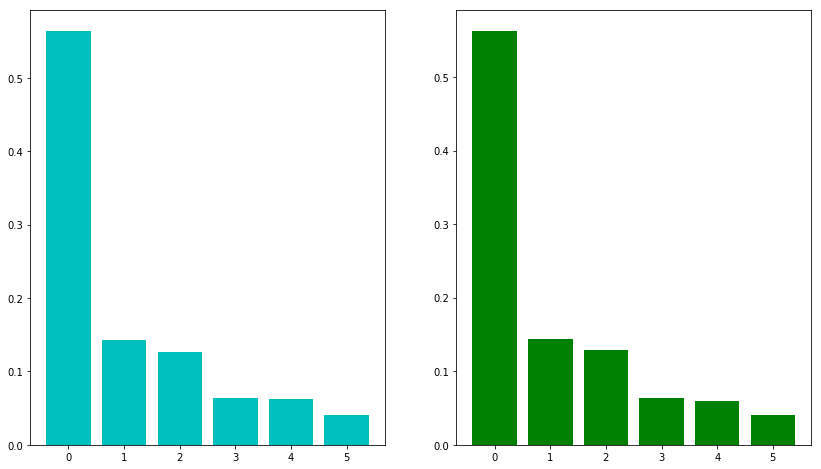

In [17]:
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.bar(np.arange(len(train_clusters_counts)-1), train_clusters_counts.values[:-1],  color='c') 
plt.subplot(122)
plt.bar(np.arange(len(test_clusters_counts)-1), test_clusters_counts.values[:-1], color='g');

Як можна зрозуміти з отриманих перевірок кількість кластерів котра була ззначенна раніше правдива. Проведемо кластеризацію всіх вхідних даних.

In [18]:
scaler = StandardScaler()
scaler.fit(df.values)
X_numeric_scaled = scaler.transform(df.values)

In [19]:
dbscan = DBSCAN(n_jobs=-1)
numeric_clusters = dbscan.fit_predict(X_numeric_scaled)

In [20]:
np.unique(numeric_clusters, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([    7, 33054,  2354,  7472,  3741,  3582,  8394]))

Розглянемо випадок коли третій стовпець вважаємо категоріальним

In [21]:
df = pd.read_csv('demo_categorical.csv')

Розібємо дані на дві частини тренувальні і тестові

In [22]:
X_train, X_test = train_test_split(df.values, random_state=9)

In [23]:
X_train.shape, X_test.shape

((43953, 8), (14651, 8))

Промаштабуємо дані так, щоб одиничну диперсію

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled.var(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Для кластеризації скористаємось алгоритмом DBSCAN оскільки він вміє працювати з даними які містять шум і для нього не потрібно задавати число кластерів, він підрахує їх сам.

Спробуємо визначити кластери спочатку для стандартних налаштувань методу

In [27]:
dbscan = DBSCAN(n_jobs=-1)

In [28]:
clusters = dbscan.fit_predict(X_train_scaled)

In [29]:
np.unique(clusters, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([    6, 24803,  1768,  6277,  5578,  2719,  2802]))

In [30]:
for eps in np.arange(0.1, 1, 0.05):
    print("\neps={}".format(np.round(eps, 3)))
    dbscan = DBSCAN(eps=eps, n_jobs=-1)
    clusters = dbscan.fit_predict(X_train_scaled)
    res = np.unique(clusters, return_counts=True)
    print("Отримані кластери: {}".format(res[0]))
    print("Розміри кластера: {}".format(res[1]))


eps=0.1
Отримані кластери: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Розміри кластера: [  706 24622     6  6058  5379    39  2649    13   347  2154    29    14
    54     8   375   249     6    36    71    54    12    80    23    26
    21    85    26    42     6     7     9    20    28    95    11    11
     5     9    18     9    25     9     8    40    10     7     8    10
    11     5    24    38     8    15    11     6    20     5    23     5
    18     7     8     7    17     5     5     9     5     7     7     6
     5     5     7     8     8     6     8    10     5     7     6     7
     8     5     7    10     9     1     7     3     4     6     5     5]

eps=0.15
Отримані кластери: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 1

Також було розбито на 6 кластерів і якщо порівнювати значення частот при $eps=0.5$ для числового і категоріальних впадків 3 стовпця то вони аналогічні(варто перевірити чи всі елементи одинаково розподіляють по кластерах). Проте випадок коли вважати 3 стовпець початкових даних категоріальним виглядає більш правдоподібніше і якісніше оскільки на нього на тк сильно впливають налаштування гіперпараметру.

Перевіримо чи на ідентичні кластери розбиває метод для числового і категоріального 3 стовпця

In [31]:
scaler = StandardScaler()
scaler.fit(df.values)
X_categorical_scaled = scaler.transform(df.values)

In [32]:
dbscan = DBSCAN(n_jobs=-1)
categorical_clusters = dbscan.fit_predict(X_categorical_scaled)

In [33]:
np.all(categorical_clusters == numeric_clusters)

True

Отже, результи котрі отримуємо довома шляхами ідентичні.

# Висновок

Нема різниці яким типом рахувати третій стовбець початкових даних оскільки результати котрі дає метод одинакові. Проте варто відмітити те, що у випадку що підчас числового випадку метод працює значно швидше(оскільки менше ознак) проте сильно залежить від значення параметру $eps$. В свою чергу використання категоріальної ознаки повертає стабільніші результати і підтверджує припущення про кількість кластерів котра дорівнює __6__.